<a href="https://colab.research.google.com/github/gjm112/DSCI401/blob/main/Exam1_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
cereal = pd.read_csv("https://raw.githubusercontent.com/gjm112/LoyolaTeaching/main/cereal.csv")
mfr = pd.read_csv("https://raw.githubusercontent.com/gjm112/LoyolaTeaching/main/cereal_mfr.csv")


In [87]:
#1a
cereal.merge(mfr, how = "left")

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_full
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Ralston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Ralston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills


In [88]:
#1b
cereal2 = cereal.merge(mfr, how = "left")
cereal2[cereal2.sodium <= 200].groupby("mfr_full").mean()[["calories","protein","fat"]]

,calories,protein,fat
mfr_full,,,
American Home Food Products,100.000000,4.000000,1.000000
General Mills,110.714286,2.214286,1.285714
Kelloggs,108.571429,2.357143,0.714286
Nabisco,86.666667,2.833333,0.166667
Post,111.250000,2.375000,1.000000
Quaker Oats,86.666667,3.166667,1.666667
Ralston Purina,120.000000,2.800000,1.800000


In [89]:
#1c
cereal2["cal_per_cup"] = cereal2.calories/cereal2.cups
cereal2.sort_values(by = "cal_per_cup", ascending = False)[["mfr_full","cal_per_cup"]].head(5)


,mfr_full,cal_per_cup
33,Post,440.000000
34,Post,363.636364
51,General Mills,260.000000
46,Kelloggs,238.805970
13,General Mills,220.000000


In [90]:
#1d
cereal2.sort_values(by = "cal_per_cup").groupby("mfr_full").apply(lambda x: x.tail(1))


,,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_full,cal_per_cup
mfr_full,,,,,,,,,,,,,,,,,,,
American Home Food Products,43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.00,1.00,54.850917,American Home Food Products,100.000000
General Mills,51,Oatmeal Raisin Crisp,G,C,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50,30.450843,General Mills,260.000000
Kelloggs,46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351,Kelloggs,238.805970
Nabisco,0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Nabisco,212.121212
Post,33,Grape-Nuts,P,C,110,3,0,170,3.0,17.0,3,90,25,3,1.00,0.25,53.371007,Post,440.000000
Quaker Oats,56,Quaker Oat Squares,Q,C,100,4,1,135,2.0,14.0,6,110,25,3,1.00,0.50,49.511874,Quaker Oats,200.000000
Ralston Purina,44,Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.00,1.00,37.136863,Ralston Purina,150.000000


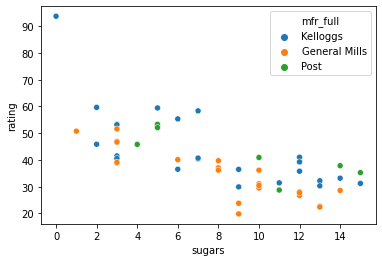

In [91]:
#1e
import seaborn as sns
sns.scatterplot(data=cereal2.loc[cereal2["mfr"].isin(["G","P","K"])], x="sugars", y="rating", hue="mfr_full")

In [92]:
#1f
print(cereal.groupby("shelf")[["protein","potass"]].corr())

#Even better way
cereal.groupby("shelf")[["protein","potass"]].apply(lambda x : x.corr().iloc[0,1])

                protein    potass
shelf                            
1     protein  1.000000  0.442439
      potass   0.442439  1.000000
2     protein  1.000000  0.479806
      potass   0.479806  1.000000
3     protein  1.000000  0.711762
      potass   0.711762  1.000000


shelf
1    0.442439
2    0.479806
3    0.711762
dtype: float64

In [93]:
#1g
cereal.groupby("shelf")["calories"].apply(lambda x: x.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])).to_frame().reset_index().pivot(index = "shelf", columns = "level_1", values = "calories")

level_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
shelf,,,,,,,,,,,
1,80.0,90.0,98.0,100.0,100.0,105.0,110.0,110.0,110.0,110.0,110.0
2,90.0,100.0,100.0,110.0,110.0,110.0,110.0,110.0,120.0,120.0,120.0
3,50.0,70.0,90.0,100.0,100.0,110.0,110.0,120.0,130.0,140.0,160.0


In [38]:
import seaborn as sns
import pandas as pd
ins = pd.read_csv("/content/inspections_clean.csv")



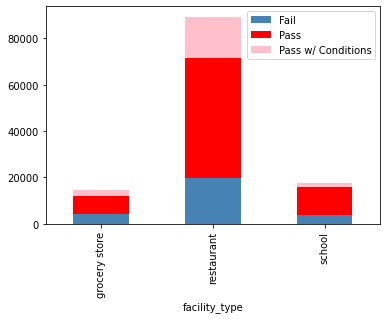

In [113]:
#2a
#2d
#facility type with 
test = ins.loc[ins["facility_type"].isin(["grocery store","restaurant","school"])][["results","facility_type","license_number"]].groupby(["facility_type","results"]).count()
greg = test.reset_index().pivot(index = "facility_type", columns = "results", values = "license_number").reset_index()
greg["facility_type"]
steve = pd.DataFrame({"facility_type" : greg["facility_type"],
              "Fail" : greg.reset_index()["Fail"],
              "Pass" : greg.reset_index()["Pass"],
              "Pass w/ Conditions" : greg.reset_index()["Pass w/ Conditions"]})

steve.set_index("facility_type").plot(kind='bar', stacked=True, color=['steelblue', 'red',"pink"])


In [88]:
greg

results,Fail,Pass,Pass w/ Conditions
facility_type,,,
grocery store,4077,8117,2537
restaurant,19608,52006,17766
school,3595,12382,1831
